# Differential Expression Analysis in GenePattern Notebook

Find genes that are significantly differentially expressed between classes of samples.

## Before you begin

* Sign in to GenePattern by entering your username and password into the form below. 
* Gene expression data must be in a [GCT or RES file](https://genepattern.broadinstitute.org/gp/pages/protocols/GctResFiles.html).
    * Example file: [all_aml_test.gct](https://datasets.genepattern.org/data/all_aml/all_aml_test.gct).
* The class of each sample must be identified in a [CLS file](https://genepattern.broadinstitute.org/gp/pages/protocols/ClsFiles.html).
    * Example file: [all_aml_test.cls](https://datasets.genepattern.org/data/all_aml/all_aml_test.cls).
* Learn more by reading about [file formats](http://www.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT).


In [66]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

## Step 0: Import data from GEO

In [3]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [4]:
geoimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')
geoimporter_job_spec = geoimporter_task.make_job_spec()
geoimporter_job_spec.set_parameter("GEO.accession", "GSE121239")
geoimporter_job_spec.set_parameter("GEO.SOFT.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run633730769069626906.tmp/GSE121239_family.soft.gz")
geoimporter_job_spec.set_parameter("Drop.NA.Rows", "TRUE")
geoimporter_job_spec.set_parameter("data.column.name", "VALUE")
geoimporter_job_spec.set_parameter("output.filename", "<GEO.accession><GEO.SOFT.file_basename>")
geoimporter_job_spec.set_parameter("ftp.proxy.server", "")
geoimporter_job_spec.set_parameter("ftp.proxy.username", "sc9295")
geoimporter_job_spec.set_parameter("ftp.proxy.password", "Csj981224!!")
geoimporter_job_spec.set_parameter("http.proxy.server", "")
geoimporter_job_spec.set_parameter("http.proxy.username", "")
geoimporter_job_spec.set_parameter("http.proxy.password", "")
geoimporter_job_spec.set_parameter("job.memory", "2Gb")
geoimporter_job_spec.set_parameter("job.walltime", "02:00:00")
geoimporter_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(geoimporter_task)

job478673 = gp.GPJob(genepattern.session.get(0), 478673)
genepattern.display(job478673)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')

GPJobWidget(job_number=478673)

## Step 1: PreprocessDataset

Preprocess gene expression data to remove platform noise and genes that have little variation. You can test this step by starting a job using parameters entered into the form below.

### Considerations

* PreprocessDataset can preprocess the data in one or more ways (in this order):
    1. Set threshold and ceiling values. Any value lower/higher than the threshold/ceiling value is reset to the threshold/ceiling value.
    2. Convert each expression value to the log base 2 of the value.
    3. Remove genes (rows) if a given number of its sample values are less than a given threshold.
    4. Remove genes (rows) that do not have a minimum fold change or expression variation.
    5. Discretize or normalize the data.
* ComparativeMarkerSelection expects non-log-transformed data. Some calculations, such as Fold Change, will produce incorrect results on log transformed data.
* If you did not generate the expression data, check whether preprocessing steps have already been taken before running the PreprocessDataset module.
* Learn more by reading about the [PreprocessDataset](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=PreprocessDataset) module.

<div class="alert alert-info">
<h3 style="position: relative; top: -10px">Instructions</h3>
Click the *Run* button on the analysis below.</div>

In [ ]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://cloud.genepattern.org/gp/jobResults/478673/GSE121239GSE121239_family.soft.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "0")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "20000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "1")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.log2.preprocessed")
genepattern.display(preprocessdataset_task)

job478678 = gp.GPJob(genepattern.session.get(0), 478678)
genepattern.display(job478678)

## Step 1.5: Create CLS File for phenote type

In [ ]:
clsfilecreator_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')
clsfilecreator_job_spec = clsfilecreator_task.make_job_spec()
clsfilecreator_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run1966867074049994329.tmp/GSE121239GSE121239_family.soft.gct")
clsfilecreator_job_spec.set_parameter("job.memory", "2Gb")
clsfilecreator_job_spec.set_parameter("job.walltime", "02:00:00")
clsfilecreator_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(clsfilecreator_task)

job478677 = gp.GPJob(genepattern.session.get(0), 478677)
genepattern.display(job478677)

## Step 2: ComparativeMarkerSelection

ComparativeMarkerSelection computes differential gene expression. For each gene, it uses a test statistic to calculate the difference in gene expression between classes and then computes a p-value to estimate the significance of the test statistic score.

Because testing tens of thousands of genes simultaneously increases the possibility of mistakenly identifying a non-marker gene as a marker gene (a false positive), ComparativeMarkerSelection corrects for multiple hypothesis testing by computing both false discovery rates (FDR) and family-wise error rates (FWER). 

### Considerations

* If the data set includes at least 10 samples per class, use the default value of 1000 permutations to ensure accurate p-values. If the data set includes fewer than 10 samples in any class, permuting the samples cannot give an accurate p-value; specify 0 permutations to use asymptotic p-values instead.
* If the data set includes more than two classes, use the phenotype test parameter to analyze each class against all others (one-versus-all) or all class pairs (all pairs).
* Learn more by reading about the [ComparativeMarkerSelection](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelection) module.


<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the PreprocessDataset job above finishes running, send the GCT result of that job to ComparativeMarkerSelection below. To do this either drag-and-drop the link for the file above to the *input.file* input below, or click the link for the file above and select *Send to an Existing GenePattern Cell > ComparativeMarkerSelection* in the menu that appears.</p>

<p>For your convenience, the necessary CLS file for ComparativeMarkerSelection is already supplied for the analysis below. Once this is done, click *Run* for the analysis below.</p>
</div>

In [ ]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/478678/GSE121239GSE121239_family.soft.log2.preprocessed.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run4860034439386685795.tmp/GSE121239GSE121239_family.soft.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "true")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.display(comparativemarkerselection_task)

job478681 = gp.GPJob(genepattern.session.get(0), 478681)
genepattern.display(job478681)

## Step 3: ComparativeMarkerSelectionViewer

Run the ComparativeMarkerSelectionViewer module to view the results. The viewer displays the test statistic score, its p value, two FDR statistics and three FWER statistics for each gene. 

### Considerations

* Generally, researchers identify marker genes based on FDR rather than the more conservative FWER.
* Often, marker genes are identified based on an FDR cutoff value of .05, which indicates that a gene identified as a marker gene has a 1 in 20 (5%) chance of being a false positive. Select Edit>Filter Features>Custom Filter to filter results based on that criteria (or any other).
* Learn more by reading about the [ComparativeMarkerSelectionViewer](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelectionViewer) module.

<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the ComparativeMarkerSelection job above finishes, send the ODF result of that job to ComparativeMarkerSelectionViewer below. This can be achieved in a method similar to the one described in the last step.</p>
<p>Once this is accomplished, go back up to the PreprocessDataset job and also send its GCT output to ComparativeMarkerSelectionViewer.</p>

<p>Once both files are sent, click *Run* for the analysis below. Once the job downloads the necessary data it should display a visualization of the differential expression results.</p>
</div>

In [ ]:
comparativemarkerselectionviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')
comparativemarkerselectionviewer_job_spec = comparativemarkerselectionviewer_task.make_job_spec()
comparativemarkerselectionviewer_job_spec.set_parameter("comparative.marker.selection.filename", "")
comparativemarkerselectionviewer_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/478678/GSE121239GSE121239_family.soft.log2.preprocessed.gct")
genepattern.display(comparativemarkerselectionviewer_task)

job479040 = gp.GPJob(genepattern.session.get(0), 479040)
genepattern.display(job479040)

In [96]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
gse121239gse121239_family_soft_log2_preprocessed_comp_marker_odf_478681 = ODF(job478681.get_file("GSE121239GSE121239_family.soft.log2.preprocessed.comp.marker.odf"))
gse121239gse121239_family_soft_log2_preprocessed_comp_marker_odf_478681

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,1,1559881_PM_s_at,BM463827,24.033516,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.560620,2.435448,0.086969,1.874828,0.220133,0
1,2,214592_PM_s_at,BE259395,21.657427,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.240357,2.790493,0.041367,2.550136,0.104795,0
2,3,229212_PM_at,BE220341,21.343084,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.205038,2.954088,0.035538,2.749050,0.092250,0
3,4,214055_PM_x_at,AW238632,20.223119,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.083899,3.430691,0.014874,3.346792,0.042374,0
4,5,1554021_PM_a_at,AF505656,19.591342,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.360858,2.749043,0.064687,2.388186,0.194870,0
5,6,203181_PM_x_at,AW149364,19.519591,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.139717,3.316511,0.023945,3.176795,0.081172,0
6,7,221427_PM_s_at,NM_030937,19.237065,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.144433,3.008471,0.026319,2.864038,0.079668,0
7,8,212198_PM_s_at,AL515964,19.199882,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.135256,3.034583,0.024810,2.899326,0.074192,0
8,9,201394_PM_s_at,U23946,18.945978,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.122276,3.258206,0.023250,3.135930,0.065350,0
9,10,211921_PM_x_at,AF348514,18.944552,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.089370,3.604151,0.016655,3.514781,0.049479,0


In [90]:
id_refs = {
    'ELF1': ['212420','212418'],
    'IRF1': ['202531','238725'],
    'SYNGR1': ['204287','210613'],
    'UNC5A': ['236448','243833'],
    'MT1F': ['213629','217165'],
}

def get_target_gene_ranking(gene_list,df):
    finding_result = pd.DataFrame(columns=df.columns)
    for gene_name, gene_id in gene_list.items():
        target_gene = df[(df['Feature'].str.contains(gene_id[0]))|(df['Feature'].str.contains(gene_id[1]))]
        finding_result = finding_result.append(target_gene)
#         finding_result['Gene_Name'] = gene_name
    return finding_result

In [92]:
# filter gene by FDR and get new ranking
df1 = gse121239gse121239_family_soft_log2_preprocessed_comp_marker_odf_478681
df1_new = df1[(df1['FDR(BH)'] <= 0.05)]
df1_new.insert(loc=1, column="Rank_2", value=list(df1_new['Score'].abs().rank(ascending=False)))
df1_new.loc[:,'Rank_2'] = df1_new['Rank_2'].astype(int)
df1_new

/opt/conda/envs/python3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,1,1,1559881_PM_s_at,BM463827,24.033516,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.560620,2.435448,0.086969,1.874828,0.220133,0
1,2,2,214592_PM_s_at,BE259395,21.657427,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.240357,2.790493,0.041367,2.550136,0.104795,0
2,3,3,229212_PM_at,BE220341,21.343084,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.205038,2.954088,0.035538,2.749050,0.092250,0
3,4,4,214055_PM_x_at,AW238632,20.223119,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.083899,3.430691,0.014874,3.346792,0.042374,0
4,5,5,1554021_PM_a_at,AF505656,19.591342,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.360858,2.749043,0.064687,2.388186,0.194870,0
5,6,6,203181_PM_x_at,AW149364,19.519591,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.139717,3.316511,0.023945,3.176795,0.081172,0
6,7,7,221427_PM_s_at,NM_030937,19.237065,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.144433,3.008471,0.026319,2.864038,0.079668,0
7,8,8,212198_PM_s_at,AL515964,19.199882,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.135256,3.034583,0.024810,2.899326,0.074192,0
8,9,9,201394_PM_s_at,U23946,18.945978,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.122276,3.258206,0.023250,3.135930,0.065350,0
9,10,10,211921_PM_x_at,AF348514,18.944552,0.0002,0.0,0.000299,0.001048,0.000444,1.0,0.0,0.0,0.089370,3.604151,0.016655,3.514781,0.049479,0


In [93]:
get_target_gene_ranking(id_refs,df1)

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
8744,19341,212420_PM_at,AL559590,3.150790,0.014397,0.012003,0.016646,0.034153,0.010546,1.0,1.0000,1.0000,0.044320,3.148826,0.056434,3.104505,0.106195,71
29196,45547,212418_PM_at,M82882,-0.687851,0.490102,0.480206,0.499799,0.592172,0.182733,1.0,1.0000,1.0000,0.007316,3.035402,0.044423,3.042718,0.064950,7550
4145,7576,202531_PM_at,NM_002198,5.354281,0.000400,0.000030,0.000640,0.001790,0.000570,1.0,0.5126,0.5440,0.029188,3.336942,0.020701,3.307754,0.049197,1
24398,54665,238725_PM_at,AW392551,-0.003565,0.994401,0.992806,0.995740,0.996131,0.307382,1.0,1.0000,1.0000,0.000057,3.064039,0.067908,3.064095,0.078312,5028
32988,38458,210613_PM_s_at,BC000731,-1.250667,0.200960,0.193026,0.208727,0.293731,0.090639,1.0,1.0000,1.0000,0.032663,2.415438,0.110218,2.448101,0.147662,8996
48634,11950,204287_PM_at,NM_004711,-4.324815,0.000200,0.000000,0.000299,0.001048,0.000444,1.0,0.9680,0.9804,0.151700,1.541077,0.153403,1.692777,0.125273,10000
13222,30378,243833_PM_at,AI951556,1.946564,0.061588,0.056807,0.066218,0.112981,0.034868,1.0,1.0000,1.0000,0.034385,2.175902,0.073580,2.141517,0.109862,307
48058,12931,236448_PM_at,R37358,-4.132138,0.001800,0.000936,0.002521,0.006131,0.001899,1.0,0.9901,0.9945,0.167271,0.915919,0.167843,1.083190,0.259216,9992
54464,1088,213629_PM_x_at,BF246115,-9.574725,0.000200,0.000000,0.000299,0.001048,0.000444,1.0,0.0010,0.0010,0.097144,2.876894,0.036869,2.974039,0.101058,10000
54509,945,217165_PM_x_at,M10943,-9.889422,0.000200,0.000000,0.000299,0.001048,0.000444,1.0,0.0007,0.0007,0.106452,2.789228,0.040812,2.895680,0.097545,10000


In [94]:
get_target_gene_ranking(id_refs,df1_new)

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
8744,19341,19335,212420_PM_at,AL559590,3.150790,0.014397,0.012003,0.016646,0.034153,0.010546,1.0,1.0000,1.0000,0.044320,3.148826,0.056434,3.104505,0.106195,71
4145,7576,7576,202531_PM_at,NM_002198,5.354281,0.000400,0.000030,0.000640,0.001790,0.000570,1.0,0.5126,0.5440,0.029188,3.336942,0.020701,3.307754,0.049197,1
48634,11950,11950,204287_PM_at,NM_004711,-4.324815,0.000200,0.000000,0.000299,0.001048,0.000444,1.0,0.9680,0.9804,0.151700,1.541077,0.153403,1.692777,0.125273,10000
48058,12931,12931,236448_PM_at,R37358,-4.132138,0.001800,0.000936,0.002521,0.006131,0.001899,1.0,0.9901,0.9945,0.167271,0.915919,0.167843,1.083190,0.259216,9992
54464,1088,1088,213629_PM_x_at,BF246115,-9.574725,0.000200,0.000000,0.000299,0.001048,0.000444,1.0,0.0010,0.0010,0.097144,2.876894,0.036869,2.974039,0.101058,10000
54509,945,945,217165_PM_x_at,M10943,-9.889422,0.000200,0.000000,0.000299,0.001048,0.000444,1.0,0.0007,0.0007,0.106452,2.789228,0.040812,2.895680,0.097545,10000


## Extract Gene Expression Value for plotting

In [ ]:
extractcomparativemarkerresults_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')
extractcomparativemarkerresults_job_spec = extractcomparativemarkerresults_task.make_job_spec()
extractcomparativemarkerresults_job_spec.set_parameter("comparative.marker.selection.filename", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run1764490073980176055.tmp/GSE121239GSE121239_family.soft.log2.preprocessed.comp.marker.odf")
extractcomparativemarkerresults_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/478678/GSE121239GSE121239_family.soft.log2.preprocessed.gct")
extractcomparativemarkerresults_job_spec.set_parameter("statistic", "FDR(BH)")
extractcomparativemarkerresults_job_spec.set_parameter("min", "0")
extractcomparativemarkerresults_job_spec.set_parameter("max", "0.05")
extractcomparativemarkerresults_job_spec.set_parameter("number.of.neighbors", "")
extractcomparativemarkerresults_job_spec.set_parameter("base.output.name", "<comparative.marker.selection.filename_basename>.filt")
extractcomparativemarkerresults_job_spec.set_parameter("job.memory", "2Gb")
extractcomparativemarkerresults_job_spec.set_parameter("job.walltime", "02:00:00")
extractcomparativemarkerresults_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(extractcomparativemarkerresults_task)


job479041 = gp.GPJob(genepattern.session.get(0), 479041)
genepattern.display(job479041)

In [102]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
gse121239gse121239_family_soft_log2_preprocessed_comp_marker_filt_gct_479041 = GCT(job479041.get_file("GSE121239GSE121239_family.soft.log2.preprocessed.comp.marker.filt.gct"))
gse121239gse121239_family_soft_log2_preprocessed_comp_marker_filt_gct_479041

,,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,GSM3428319,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
Name,Description,,,,,,,,,,,,,,,,,,,,,
1559881_PM_s_at,BM463827,2.296246,2.325404,2.411770,2.410080,2.353506,2.357117,2.439145,2.526585,2.416404,2.461042,...,1.654587,1.811257,1.771540,2.297276,1.786152,1.935733,2.231146,2.372395,1.767727,2.088279
214592_PM_s_at,BE259395,2.779138,2.772469,2.822698,2.756725,2.769439,2.722890,2.814825,2.811721,2.771849,2.850082,...,2.762763,2.551409,2.383476,2.640225,2.417751,2.500088,2.691819,2.703060,2.547680,2.646382
229212_PM_at,BE220341,2.907598,2.891961,2.904226,2.939937,2.974727,2.956475,3.011619,2.990034,2.962853,2.959005,...,2.881403,2.821402,2.559059,2.869978,2.724421,2.671171,2.748173,2.868631,2.851870,2.826233
214055_PM_x_at,AW238632,3.412066,3.412155,3.401389,3.420279,3.437067,3.421780,3.427535,3.438658,3.429218,3.436403,...,3.396634,3.308208,3.315790,3.355022,3.300192,3.275741,3.342650,3.381553,3.334558,3.318975
1554021_PM_a_at,AF505656,2.706153,2.702496,2.620794,2.692392,2.753799,2.694384,2.814529,2.843662,2.739658,2.818876,...,2.224382,2.473259,2.458729,2.710700,2.146072,2.280313,2.873198,2.713590,2.264942,2.571623
203181_PM_x_at,AW149364,3.325690,3.310573,3.311568,3.298627,3.335976,3.295889,3.288380,3.314479,3.290791,3.344535,...,3.189328,3.166349,3.239353,3.243328,3.069080,2.985397,3.168661,3.206050,3.079826,3.159255
221427_PM_s_at,NM_030937,3.008814,2.984106,3.029843,3.022405,3.021545,3.002953,2.983905,2.956558,2.995863,3.003917,...,2.896507,2.909840,2.788178,2.841815,2.828279,2.807050,3.008122,2.927669,2.876018,2.783972
212198_PM_s_at,AL515964,2.973113,3.012860,3.039140,3.002622,3.063791,3.037884,3.050194,3.063556,3.031221,3.011956,...,2.982223,2.862807,2.762999,2.948736,2.896110,2.846353,2.836630,2.901883,2.968113,2.987603
201394_PM_s_at,U23946,3.277523,3.253503,3.274433,3.270427,3.286531,3.231465,3.241795,3.211406,3.244514,3.239480,...,3.232345,3.069753,3.048453,3.129739,3.125226,3.104343,3.025434,3.138904,3.174603,3.129087


In [103]:
GE_data = gse121239gse121239_family_soft_log2_preprocessed_comp_marker_filt_gct_479041.loc[:,'GSM3428330':]
GE_data

,,GSM3428330,GSM3428331,GSM3428332,GSM3428333,GSM3428334,GSM3428335,GSM3428336,GSM3428337,GSM3428338,GSM3428339,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
Name,Description,,,,,,,,,,,,,,,,,,,,,
1559881_PM_s_at,BM463827,1.851308,2.105938,1.740172,1.900314,1.952002,2.424473,1.745267,1.830970,1.768958,2.073257,...,1.654587,1.811257,1.771540,2.297276,1.786152,1.935733,2.231146,2.372395,1.767727,2.088279
214592_PM_s_at,BE259395,2.616745,2.441507,2.444718,2.708638,2.472266,2.620091,2.591351,2.564341,2.676863,2.524368,...,2.762763,2.551409,2.383476,2.640225,2.417751,2.500088,2.691819,2.703060,2.547680,2.646382
229212_PM_at,BE220341,2.676365,2.928317,2.642898,2.856842,2.676337,2.850577,2.786500,2.859514,2.734955,2.736086,...,2.881403,2.821402,2.559059,2.869978,2.724421,2.671171,2.748173,2.868631,2.851870,2.826233
214055_PM_x_at,AW238632,3.395120,3.408952,3.341692,3.358452,3.277381,3.358553,3.389627,3.332672,3.344436,3.429423,...,3.396634,3.308208,3.315790,3.355022,3.300192,3.275741,3.342650,3.381553,3.334558,3.318975
1554021_PM_a_at,AF505656,2.512092,2.417489,2.179330,2.617873,1.727615,2.846691,2.518309,2.296488,1.901815,2.549193,...,2.224382,2.473259,2.458729,2.710700,2.146072,2.280313,2.873198,2.713590,2.264942,2.571623
203181_PM_x_at,AW149364,3.206551,3.309834,3.252452,3.202980,3.016750,3.332933,3.148442,3.173277,3.213784,3.287427,...,3.189328,3.166349,3.239353,3.243328,3.069080,2.985397,3.168661,3.206050,3.079826,3.159255
221427_PM_s_at,NM_030937,2.949068,2.831804,2.886920,2.959080,2.964104,2.938858,2.928349,2.842381,2.706753,2.969863,...,2.896507,2.909840,2.788178,2.841815,2.828279,2.807050,3.008122,2.927669,2.876018,2.783972
212198_PM_s_at,AL515964,2.892136,2.917761,2.817853,2.998406,2.772893,3.009767,2.946305,2.950525,2.935992,2.919974,...,2.982223,2.862807,2.762999,2.948736,2.896110,2.846353,2.836630,2.901883,2.968113,2.987603
201394_PM_s_at,U23946,3.197612,3.209380,3.227301,3.146354,2.979107,3.138447,3.194083,3.175357,3.216849,3.125021,...,3.232345,3.069753,3.048453,3.129739,3.125226,3.104343,3.025434,3.138904,3.174603,3.129087


In [104]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212418_PM_at', '212420_PM_at'],
            'IRF1': ['202531_PM_at', '238725_PM_at'], 
            'SYNGR1': ['204287_PM_at', '213854_PM_at', '210613_PM_s_at'],
            'UNC5A': ['236448_PM_at', '243833_PM_at'],
            'MT1F': ['213629_PM_at', '217165_PM_x_at']
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][1]
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0]
unc5a = id_refs['GSE121239_family.soft.gz']['UNC5A'][0]
mt1f = id_refs['GSE121239_family.soft.gz']['MT1F'][1]
gene_id_list = [elf1, irf1, syngr1, unc5a, mt1f]

In [105]:
GE_data_ = GE_data.reset_index().drop(columns='Description')
column_name_list = []

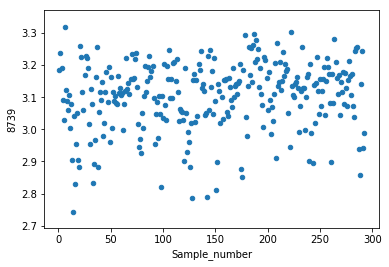

In [106]:
"""
ELF1 
""" 
df = GE_data_[GE_data_.Name==elf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name,ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

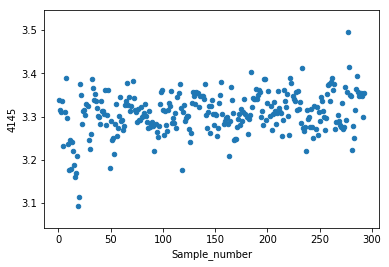

In [107]:
"""
IRF1 
""" 
df = GE_data_[GE_data_.Name==irf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

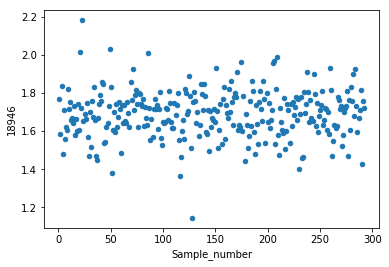

In [108]:
"""
SYNGR1
""" 
df = GE_data_[GE_data_.Name==syngr1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

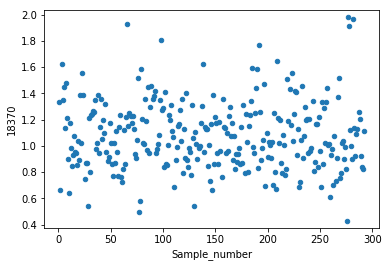

In [109]:
"""
UNC5A
""" 
df = GE_data_[GE_data_.Name==unc5a].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

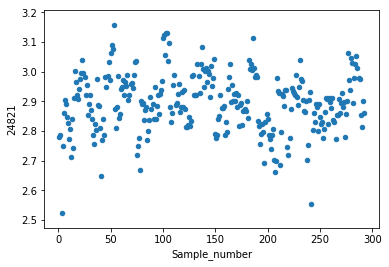

In [110]:
"""
MT1F
""" 
df = GE_data_[GE_data_.Name==mt1f].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

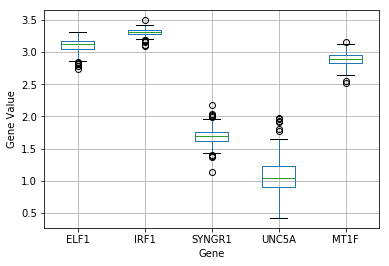

In [111]:
""" 
Box plot 
"""

df = GE_data_[GE_data_.Name.isin(gene_id_list)]
df = df.T.drop(['Name']) 
df = df.astype(float) 
df.boxplot(column=column_name_list.set_xticklabels(['ELF1', 'IRF1', 'SYNGR1','UNC5A','MT1F']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

In [116]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
GE_data_['CV'] = GE_data_.apply(lambda row : cv(row.T.drop(['Name'])), axis = 1)  
GE_data_['Gene_number'] = range(1, len(GE_data_) + 1) 

(0, 0.1)

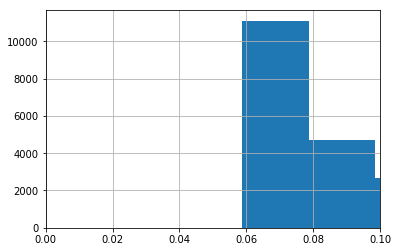

In [118]:
GE_data_['CV'].hist(bins=100).set_xlim(0,0.1)

In [113]:
for gene_ref_id in gene_id_list:
    print(GE_data_[GE_data_['Name']==gene_ref_id]['CV'] )

8739    0.034207
Name: CV, dtype: float64
4145    0.014873
Name: CV, dtype: float64
18946    0.074004
Name: CV, dtype: float64
18370    0.239308
Name: CV, dtype: float64
24821    0.033686
Name: CV, dtype: float64


In [114]:
sorted_raw_expre = GE_data_.sort_values(by='CV', ascending=False).reset_index()

In [115]:
for gene_ref_id in gene_id_list:
    print("gene_ref_id",gene_ref_id)
    print(sorted_raw_expre[sorted_raw_expre['Name']==gene_ref_id].index)

gene_ref_id 212420_PM_at
Int64Index([19270], dtype='int64')
gene_ref_id 202531_PM_at
Int64Index([24252], dtype='int64')
gene_ref_id 204287_PM_at
Int64Index([10212], dtype='int64')
gene_ref_id 236448_PM_at
Int64Index([1267], dtype='int64')
gene_ref_id 217165_PM_x_at
Int64Index([19430], dtype='int64')
